## Cleaning the water temperature data for Lake Michigan

### Data source

https://coastwatch.glerl.noaa.gov/statistic/statistic.html


Note: there are **8766** days between Jan 1, 1995 and Dec 31, 2018.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/lake_michigan/avg_water_temps.csv')
print(df.shape)
df.head()

(8766, 8)


,Year,Day,Superior,Michigan,Huron,Erie,Ontario,StClr
0,1995,1,3.29,5.02,4.50,4.70,4.08,1.87
1,1995,2,3.28,4.95,4.45,4.64,4.05,1.83
2,1995,3,0.20,0.20,0.20,0.20,0.20,0.20
3,1995,4,0.20,0.20,0.20,0.20,0.20,0.20
4,1995,5,0.20,0.20,0.20,0.20,0.20,0.20


In [3]:
mic = df[['Year', 'Day', 'Michigan']]
print(mic.shape)
mic.head()

(8766, 3)


,Year,Day,Michigan
0,1995,1,5.02
1,1995,2,4.95
2,1995,3,0.20
3,1995,4,0.20
4,1995,5,0.20


In [4]:
mic.tail()

,Year,Day,Michigan
8761,2018,361,4.17
8762,2018,362,4.04
8763,2018,363,4.03
8764,2018,364,4.07
8765,2018,365,4.07


In [5]:
mic.isnull().sum()

Year        0
Day         0
Michigan    0
dtype: int64

In [6]:
mic.dtypes

Year          int64
Day           int64
Michigan    float64
dtype: object

In [7]:
# this is the data for lake michigan daily average temperatures (1995-2019)

mic.to_csv('data/lake_michigan/lake_michigan_water_temp_1995_2019.csv', index=False)

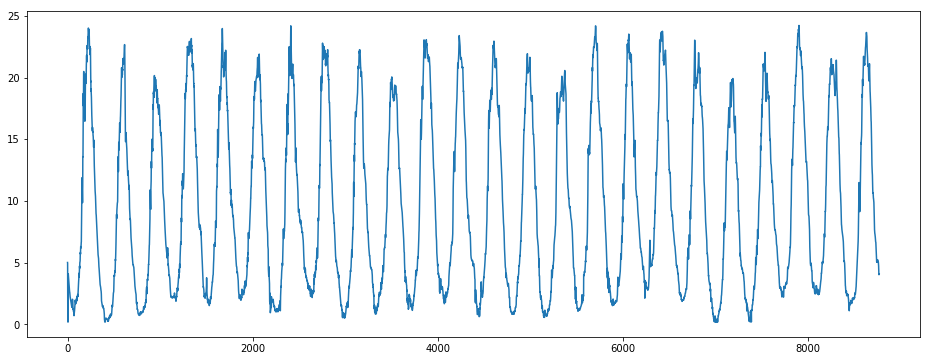

In [10]:
# this plot of the temperature is highly seasonal, as we would expect.
plt.figure(figsize=(16, 6))

plt.plot(mic['Michigan']);

In [22]:
mic['DATE'] = pd.date_range(start='1995-01-01', end='2018-12-31')
# pd.to_datetime(mic['Day'], origin='1995-01-01')
print(mic.shape)
mic.head()

(8766, 4)


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,Day,Michigan,DATE
0,1995,1,5.02,1995-01-01
1,1995,2,4.95,1995-01-02
2,1995,3,0.20,1995-01-03
3,1995,4,0.20,1995-01-04
4,1995,5,0.20,1995-01-05


In [23]:
mic.dtypes

Year                 int64
Day                  int64
Michigan           float64
DATE        datetime64[ns]
dtype: object

In [31]:
water_temp = mic[['DATE', 'Michigan']]
print(water_temp.shape)
water_temp.head()

(8766, 2)


,DATE,Michigan
0,1995-01-01,5.02
1,1995-01-02,4.95
2,1995-01-03,0.20
3,1995-01-04,0.20
4,1995-01-05,0.20


In [34]:
water_temp.rename(mapper={'Michigan': 'lake_temp'}, axis=1, inplace=True)
water_temp.head()


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,DATE,lake_temp
0,1995-01-01,5.02
1,1995-01-02,4.95
2,1995-01-03,0.20
3,1995-01-04,0.20
4,1995-01-05,0.20


In [39]:
# saving the full data
water_temp.to_csv('data/lake_michigan/lake_michigan_water_temp_1995_2019_dateTime.csv', index=False)

In [43]:
# saving the data for Jan 01, 2015 to Dec 31, 2018
water_temp[water_temp['DATE'] >= '2015'].to_csv('data/lake_michigan/jan012015_dec312018_averages.csv', index=False)

In [44]:
# saving the data for Apr 01, 2013 to Dec 31, 2018
water_temp[water_temp['DATE'] >= '2013-04-01'].to_csv('data/lake_michigan/apr012013_dec312018.csv', index=False)